# INF1340_Final Project_UN_MigrantStockTotal_2015_EDA

Jopyter notebook link: https://jupyter.utoronto.ca/user/9a3fef23-10c5-4a97-921a-ba1092c22987/notebooks/INF1340_Final%20Project_UN_MigrantStockTotal_2015_EDA.ipynb

In [36]:
# import dependices
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import pandas as pd

# Table 1 EDA

In [2]:
! pip install openpyxl

In [53]:
# read original xlsx
df_UN_T1 = pd.read_excel("data/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 1")
df_UN_T1.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# remove the introduction text
df_UN_T1.drop(df_UN_T1.index[0:15], axis=0, inplace=True)
df_UN_T1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243.0,...,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325.0,...,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918.0,...,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128.0,...,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668.0,...,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [55]:
# check headers
df_UN_T1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [56]:
# remove unnecessary columns 
df_UN_T1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df_UN_T1.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,59105261,56778501,59244124,64272611,79130668.0,91262036.0,31641006,30501966,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [57]:
# split 1st sub-dataset sorted by developing status
df_dev = df_UN_T1.iloc[0:5]
df_dev

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,59105261,56778501,59244124,64272611,79130668.0,91262036.0,31641006,30501966,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [58]:
# rename headers
df_dev = df_dev.rename(columns={'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Area','Unnamed: 5': 'b1990','Unnamed: 6': 'b1995',
                                'Unnamed: 7': 'b2000','Unnamed: 8': 'b2005','Unnamed: 9': 'b2010','Unnamed: 10': 'b2015',
                               'Unnamed: 11': 'm1990','Unnamed: 12': 'm1995','Unnamed: 13': 'm2000','Unnamed: 14': 'm2005',
                               'Unnamed: 15': 'm2010','Unnamed: 16': 'm2015','Unnamed: 17': 'f1990','Unnamed: 18': 'f1995',
                               'Unnamed: 19': 'f2000','Unnamed: 20': 'f2005','Unnamed: 21': 'f2010','Unnamed: 22': 'f2015'})                     
df_dev

,Sort Order,Area,b1990,b1995,b2000,b2005,b2010,b2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
15,1,WORLD,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,2,Developed regions,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,3,Developing regions,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,4,Least developed countries,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,5,Less developed regions excluding least develop...,59105261,56778501,59244124,64272611,79130668.0,91262036.0,31641006,30501966,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0


In [59]:
# re-organize the df_dev
df_dev = df_dev.melt(id_vars=["Sort Order","Area"], var_name=["Sexyear"],value_name="International Migrant Stock")
df_dev

,Sort Order,Area,Sexyear,International Migrant Stock
0,1,WORLD,b1990,152563212
1,2,Developed regions,b1990,82378628
2,3,Developing regions,b1990,70184584
3,4,Least developed countries,b1990,11075966
4,5,Less developed regions excluding least develop...,b1990,59105261
...,...,...,...,...
85,1,WORLD,f2015,117584801.0
86,2,Developed regions,f2015,72863336.0
87,3,Developing regions,f2015,44721465.0
88,4,Least developed countries,f2015,5493028.0


In [60]:
# split column "Sexyear"
df_dev=(df_dev.assign(gender = lambda x: x.Sexyear.str[0].astype(str), year = lambda x: x.Sexyear.str[1:].astype(str)).drop("Sexyear",axis=1))
df_dev

,Sort Order,Area,International Migrant Stock,gender,year
0,1,WORLD,152563212,b,1990
1,2,Developed regions,82378628,b,1990
2,3,Developing regions,70184584,b,1990
3,4,Least developed countries,11075966,b,1990
4,5,Less developed regions excluding least develop...,59105261,b,1990
...,...,...,...,...,...
85,1,WORLD,117584801.0,f,2015
86,2,Developed regions,72863336.0,f,2015
87,3,Developing regions,44721465.0,f,2015
88,4,Least developed countries,5493028.0,f,2015


In [61]:
# Styling the dataset
df_dev=(df_dev.replace(to_replace =["b","m","f"],value =["Both sex","Male","Female"])
            .dropna())
df_dev

,Sort Order,Area,International Migrant Stock,gender,year
0,1,WORLD,152563212.0,Both sex,1990
1,2,Developed regions,82378628.0,Both sex,1990
2,3,Developing regions,70184584.0,Both sex,1990
3,4,Least developed countries,11075966.0,Both sex,1990
4,5,Less developed regions excluding least develop...,59105261.0,Both sex,1990
...,...,...,...,...,...
85,1,WORLD,117584801.0,Female,2015
86,2,Developed regions,72863336.0,Female,2015
87,3,Developing regions,44721465.0,Female,2015
88,4,Least developed countries,5493028.0,Female,2015


In [64]:
#remove the "male" and "both sex" rows since we only study on female data
df_dev = df_dev[df_dev["gender"] == "Female"]
df_dev

,Sort Order,Area,International Migrant Stock,gender,year
60,1,WORLD,74815702.0,Female,1990
61,2,Developed regions,42115231.0,Female,1990
62,3,Developing regions,32700471.0,Female,1990
63,4,Least developed countries,5236216.0,Female,1990
64,5,Less developed regions excluding least develop...,27464255.0,Female,1990
65,1,WORLD,79064275.0,Female,1995
66,2,Developed regions,47214055.0,Female,1995
67,3,Developing regions,31850220.0,Female,1995
68,4,Least developed countries,5573685.0,Female,1995
69,5,Less developed regions excluding least develop...,26276535.0,Female,1995


In [66]:
#sorting rows and columns
dev_sorted = df_dev.sort_values('year', ascending=False)
dev_sorted

,Sort Order,Area,International Migrant Stock,gender,year
89,5,Less developed regions excluding least develop...,39228437.0,Female,2015
88,4,Least developed countries,5493028.0,Female,2015
87,3,Developing regions,44721465.0,Female,2015
86,2,Developed regions,72863336.0,Female,2015
85,1,WORLD,117584801.0,Female,2015
84,5,Less developed regions excluding least develop...,34060745.0,Female,2010
83,4,Least developed countries,4560536.0,Female,2010
82,3,Developing regions,38621281.0,Female,2010
81,2,Developed regions,68479248.0,Female,2010
80,1,WORLD,107100529.0,Female,2010


<AxesSubplot:title={'center':'Female International Migrants in Different Developing Stage Area(1990 - 2015)'}>

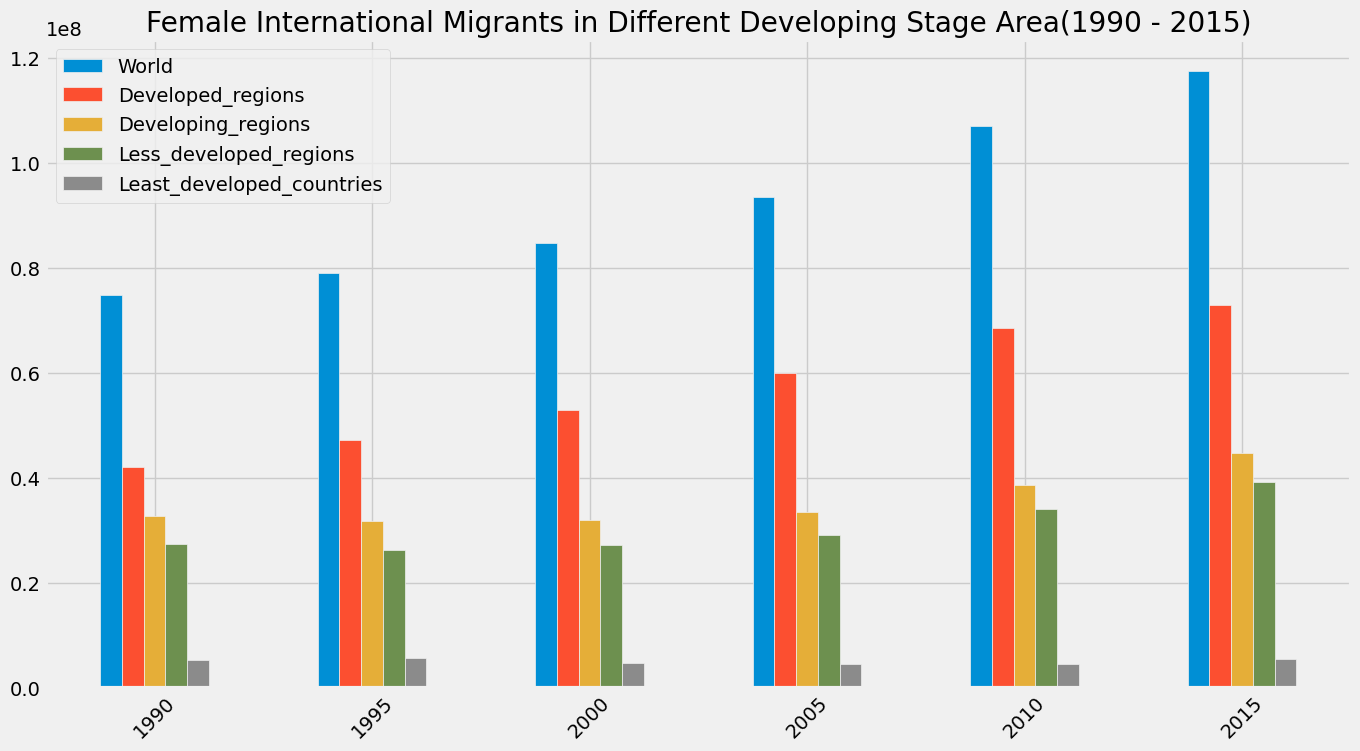

In [120]:
# Create the barplot.
# input data
World = [74815702.0, 79064275.0, 84818470.0, 93402426.0, 107100529.0, 117584801.0]  
Developed_regions = [42115231.0, 47214055.0, 52838567.0, 59963332.0, 68479248.0, 72863336.0]
Developing_regions = [32700471.0, 31850220.0, 31979903.0, 33439094.0, 38621281.0, 44721465.0]
Less_developed_regions = [27464255.0, 26276535.0, 27257983.0, 29006723.0, 34060745.0, 39228437.0]
Least_developed_countries = [5236216.0, 5573685.0, 4721920.0, 4432371.0, 4560536.0, 5493028.0]
# Set index
index = ['1990', '1995', '2000',
         '2005', '2010', '2015']
dev_bar = pd.DataFrame({'World': World,
            'Developed_regions': Developed_regions,
            'Developing_regions': Developing_regions,
            'Less_developed_regions': Less_developed_regions,
            'Least_developed_countries': Least_developed_countries}, index=index)
dev_bar.plot.bar(figsize=(15,8),rot=45, title='Female International Migrants in Different Developing Stage Area(1990 - 2015)')

<AxesSubplot:title={'center':'Female International Migrants in Different Developing Stage Area(1990 - 2015)'}>

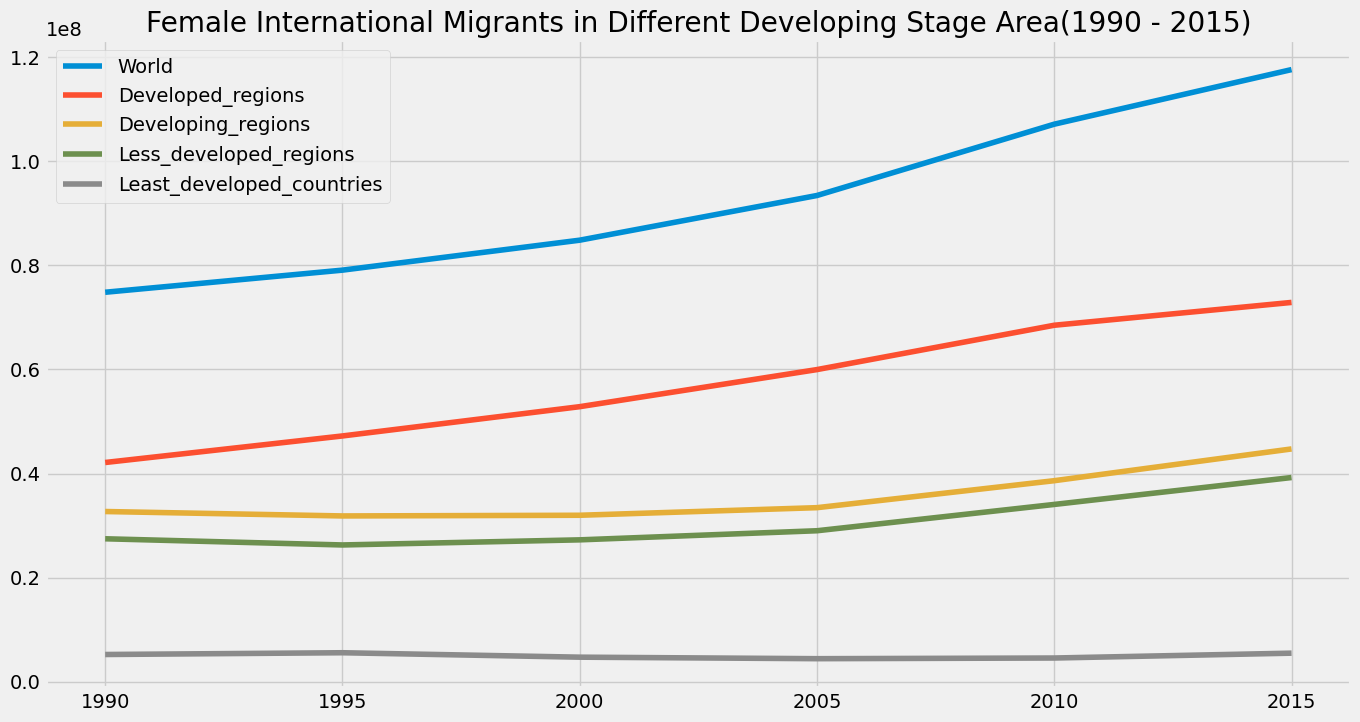

In [101]:
# Create line chart
dev_bar.plot(figsize=(15,8),title='Female International Migrants in Different Developing Stage Area(1990 - 2015)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Less developed regions excluding least developed countries'),
  Text(1, 0, 'Least developed countries'),
  Text(2, 0, 'Developing regions'),
  Text(3, 0, 'Developed regions'),
  Text(4, 0, 'WORLD')])

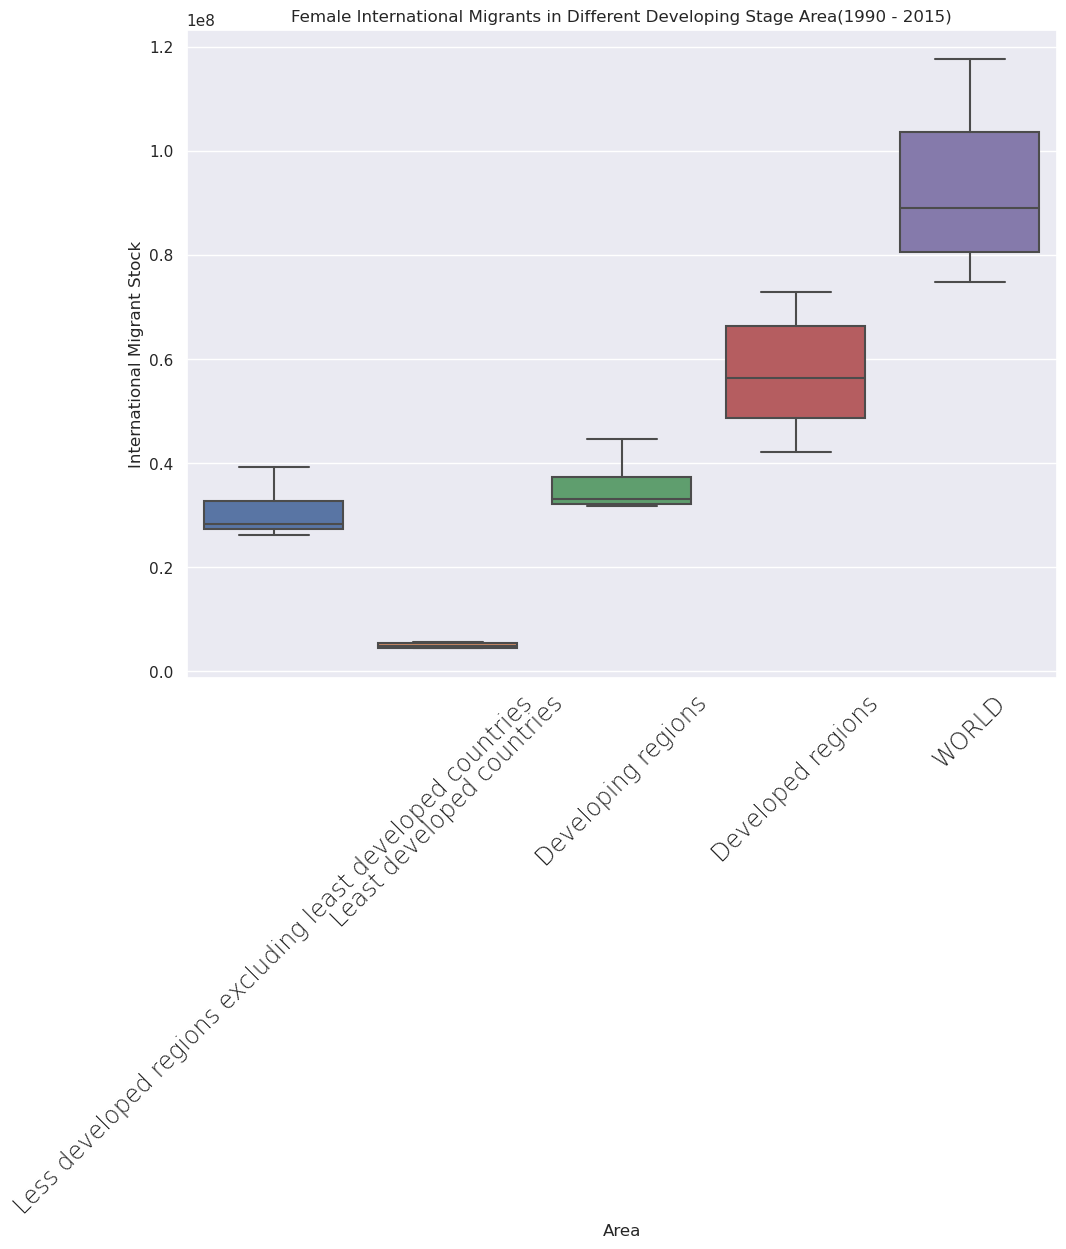

In [275]:
dev_box = sns.boxplot(data = dev_sorted, x="Area", y="International Migrant Stock").set(title = 'Female International Migrants in Different Developing Stage Area(1990 - 2015)')
sns.set(rc={'figure.figsize':(8,10)})
plt.xticks(rotation=45,    
           fontweight='light',
           fontsize='x-large' )

# Table 2 EDA

In [104]:
# read original xlsx
df_UN_T2 = pd.read_excel("data/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 2")
df_UN_T2.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# remove the introduction text
df_UN_T2.drop(df_UN_T2.index[0:15], axis=0, inplace=True)
df_UN_T2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
15,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [106]:
# check headers
df_UN_T2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [107]:
# remove unnecessary columns 
df_UN_T2.drop(columns=['Unnamed: 2', 'Unnamed: 3'],inplace=True)
df_UN_T2

,Unnamed: 0,Unnamed: 1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
15,1,WORLD,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,162.865,170.158,174.614,179.928,186.029,193.228,85.009,88.488,90.932,93.185,95.95,99.644,77.856,81.67,83.682,86.743,90.079,93.584
276,262,Tokelau,1.609,1.520,1.552,1.210,1.135,1.250,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,95.152,95.889,97.898,100.858,103.947,106.170,48.247,48.614,49.788,50.574,52.055,53.239,46.905,47.275,48.11,50.284,51.892,52.931
278,264,Tuvalu,9.004,9.227,9.419,9.694,9.827,9.916,..,..,..,..,..,..,..,..,..,..,..,..


In [108]:
# split 1st sub-dataset sorted by developing status
df_dev2 = df_UN_T2.iloc[0:5]
df_dev2

,Unnamed: 0,Unnamed: 1,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
15,1,WORLD,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [109]:
# rename headers
df_dev2 = df_dev2.rename(columns={'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Area','Unnamed: 4': 'b1990','Unnamed: 5': 'b1995',
                                'Unnamed: 6': 'b2000','Unnamed: 7': 'b2005','Unnamed: 8': 'b2010','Unnamed: 9': 'b2015',
                               'Unnamed: 10': 'm1990','Unnamed: 11': 'm1995','Unnamed: 12': 'm2000','Unnamed: 13': 'm2005',
                               'Unnamed: 14': 'm2010','Unnamed: 15': 'm2015','Unnamed: 16': 'f1990','Unnamed: 17': 'f1995',
                               'Unnamed: 18': 'f2000','Unnamed: 19': 'f2005','Unnamed: 20': 'f2010','Unnamed: 21': 'f2015'})                     
df_dev2

,Sort Order,Area,b1990,b1995,b2000,b2005,b2010,b2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
15,1,WORLD,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
16,2,Developed regions,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,568268.456,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
17,3,Developing regions,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,2318367.437,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
18,4,Least developed countries,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,292026.742,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
19,5,Less developed regions excluding least develop...,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,2026340.695,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [110]:
# re-organize the df_dev2
df_dev2 = df_dev2.melt(id_vars=["Sort Order","Area"], var_name=["Sexyear"],value_name="Total Population")
df_dev2.head(5)

,Sort Order,Area,Sexyear,Total Population
0,1,WORLD,b1990,5309667.699
1,2,Developed regions,b1990,1144463.062
2,3,Developing regions,b1990,4165204.637
3,4,Least developed countries,b1990,510057.629
4,5,Less developed regions excluding least develop...,b1990,3655147.008


In [111]:
# split column "Sexyear"
df_dev2=(df_dev2.assign(gender = lambda x: x.Sexyear.str[0].astype(str), year = lambda x: x.Sexyear.str[1:].astype(str)).drop("Sexyear",axis=1))
df_dev2

,Sort Order,Area,Total Population,gender,year
0,1,WORLD,5309667.699,b,1990
1,2,Developed regions,1144463.062,b,1990
2,3,Developing regions,4165204.637,b,1990
3,4,Least developed countries,510057.629,b,1990
4,5,Less developed regions excluding least develop...,3655147.008,b,1990
...,...,...,...,...,...
85,1,WORLD,3642266.346,f,2015
86,2,Developed regions,642053.938,f,2015
87,3,Developing regions,3000212.408,f,2015
88,4,Least developed countries,478126.625,f,2015


In [112]:
# Styling the dataset
df_dev2=(df_dev2.replace(to_replace =["b","m","f"],value =["Both sex","Male","Female"])
            .dropna())
df_dev2

,Sort Order,Area,Total Population,gender,year
0,1,WORLD,5309667.699,Both sex,1990
1,2,Developed regions,1144463.062,Both sex,1990
2,3,Developing regions,4165204.637,Both sex,1990
3,4,Least developed countries,510057.629,Both sex,1990
4,5,Less developed regions excluding least develop...,3655147.008,Both sex,1990
...,...,...,...,...,...
85,1,WORLD,3642266.346,Female,2015
86,2,Developed regions,642053.938,Female,2015
87,3,Developing regions,3000212.408,Female,2015
88,4,Least developed countries,478126.625,Female,2015


In [113]:
#remove the "male" and "both sex" rows since we only study on female data
df_dev2 = df_dev2[df_dev2["gender"] == "Female"]
df_dev2

,Sort Order,Area,Total Population,gender,year
60,1,WORLD,2639243.998,Female,1990
61,2,Developed regions,589207.436,Female,1990
62,3,Developing regions,2050036.562,Female,1990
63,4,Least developed countries,256015.073,Female,1990
64,5,Less developed regions excluding least develop...,1794021.489,Female,1990
65,1,WORLD,2848487.191,Female,1995
66,2,Developed regions,601492.755,Female,1995
67,3,Developing regions,2246994.436,Female,1995
68,4,Least developed countries,293162.612,Female,1995
69,5,Less developed regions excluding least develop...,1953831.824,Female,1995


In [123]:
#sorting rows and columns
dev_sorted2 = df_dev2.sort_values('Area', ascending=False)
dev_sorted2

,Sort Order,Area,Total Population,gender,year
60,1,WORLD,2639243.998,Female,1990
65,1,WORLD,2848487.191,Female,1995
85,1,WORLD,3642266.346,Female,2015
80,1,WORLD,3435768.139,Female,2010
70,1,WORLD,3042084.459,Female,2000
75,1,WORLD,3234553.601,Female,2005
89,5,Less developed regions excluding least develop...,2522085.783,Female,2015
79,5,Less developed regions excluding least develop...,2236549.069,Female,2005
69,5,Less developed regions excluding least develop...,1953831.824,Female,1995
64,5,Less developed regions excluding least develop...,1794021.489,Female,1990


<AxesSubplot:title={'center':'Female Population (thousands) in Different Developing Stage Area(1990 - 2015)'}>

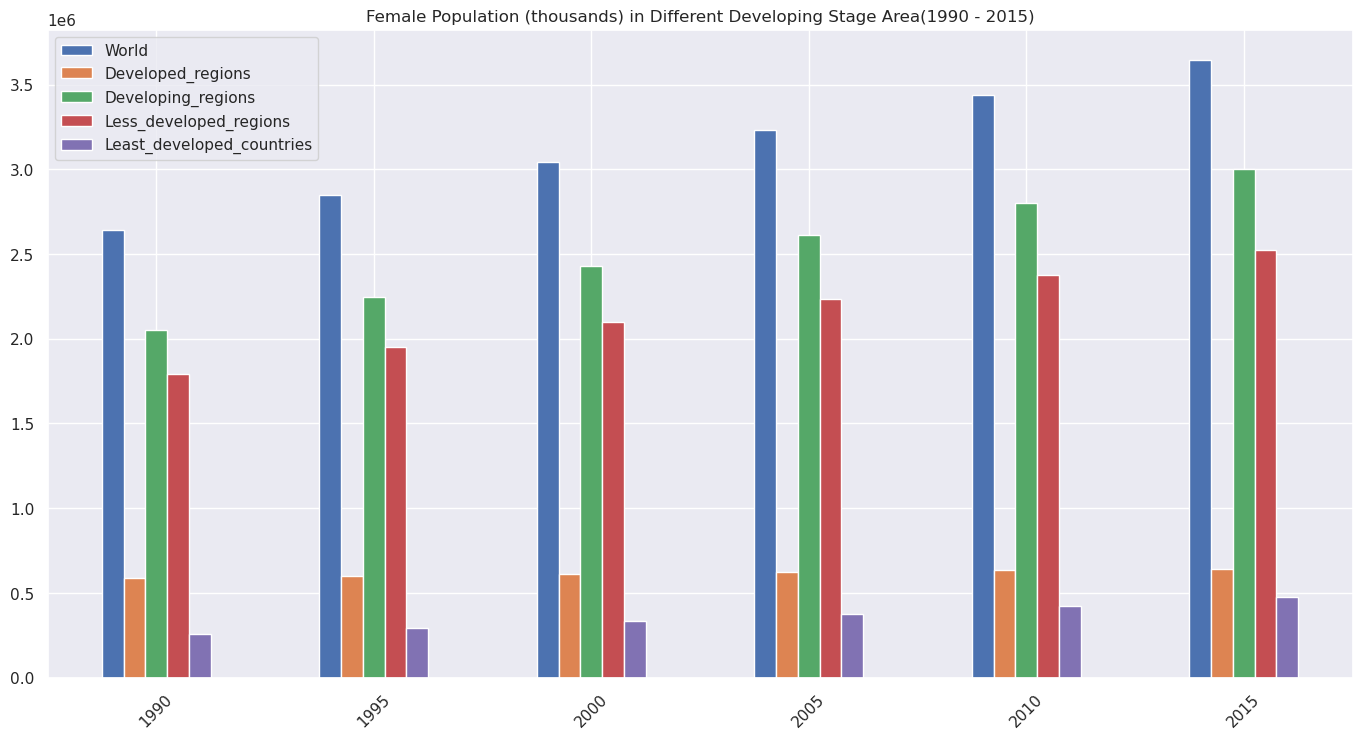

In [198]:
# Create the barplot.
# input data
World = [2639243.998, 2848487.191, 3042084.459, 3234553.601, 3435768.139, 3642266.346]  
Developed_regions = [589207.436, 601492.755, 610801.513, 620957.296, 633420.235, 642053.938]
Developing_regions = [2050036.562, 2246994.436, 2431282.946, 2613596.305, 2802347.904, 3000212.408]
Less_developed_regions = [1794021.489, 1953831.824, 2098379.334, 2236549.069, 2377490.589, 2522085.783]
Least_developed_countries = [256015.073, 293162.612, 332903.612, 377047.236, 424857.315, 478126.625]
# Set index
index = ['1990', '1995', '2000',
         '2005', '2010', '2015']
dev2_bar = pd.DataFrame({'World': World,
            'Developed_regions': Developed_regions,
            'Developing_regions': Developing_regions,
            'Less_developed_regions': Less_developed_regions,
            'Least_developed_countries': Least_developed_countries}, index=index)
dev2_bar.plot.bar(figsize=(15,8),rot=45, title='Female Population (thousands) in Different Developing Stage Area(1990 - 2015)')

<AxesSubplot:title={'center':'Female Population (thousands) in Different Developing Stage Area(1990 - 2015)'}>

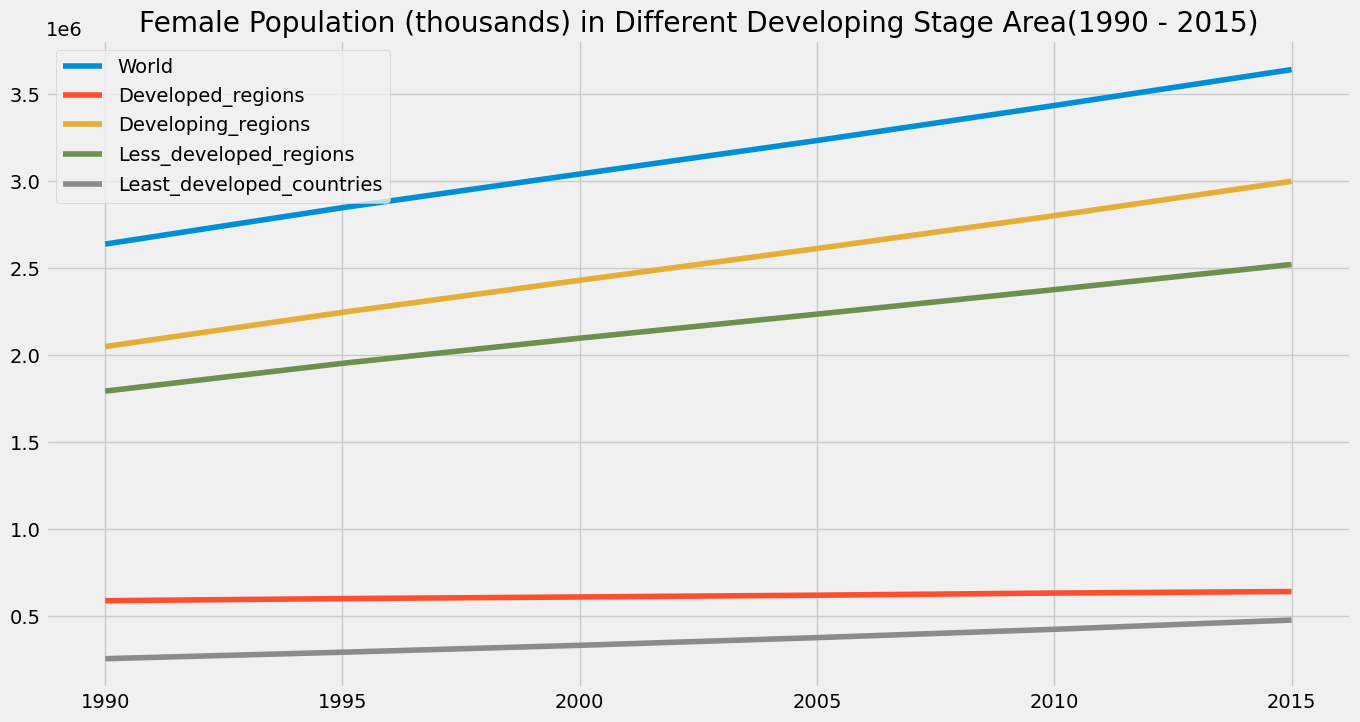

In [129]:
# Create line chart
dev2_bar.plot(figsize=(15,8),title='Female Population (thousands) in Different Developing Stage Area(1990 - 2015)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WORLD'),
  Text(1, 0, 'Less developed regions excluding least developed countries'),
  Text(2, 0, 'Least developed countries'),
  Text(3, 0, 'Developing regions'),
  Text(4, 0, 'Developed regions')])

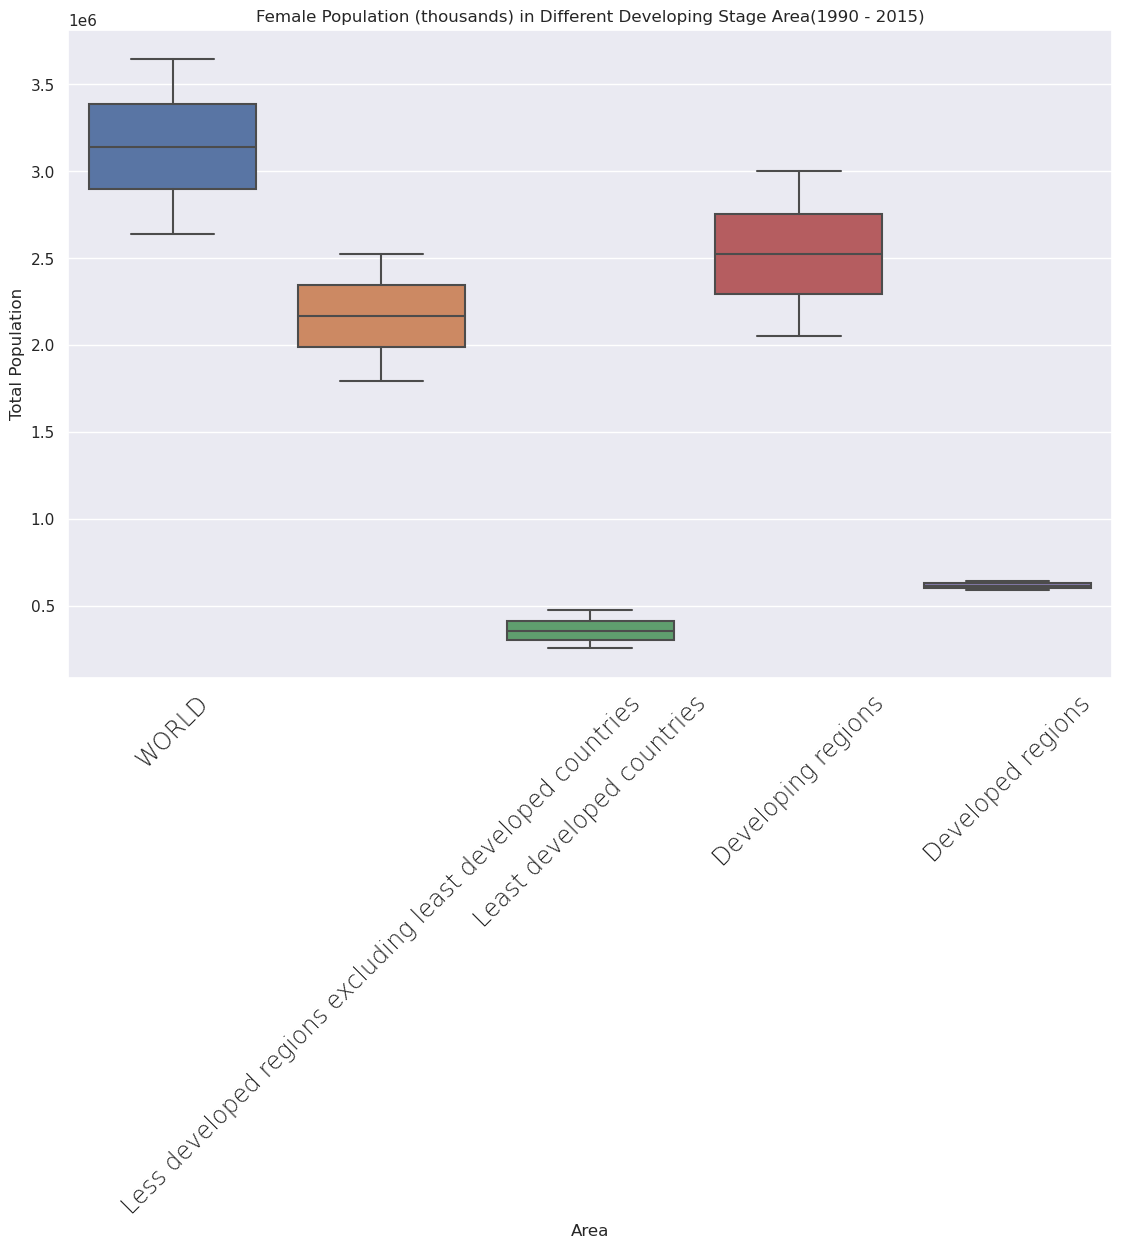

In [274]:
dev2_box = sns.boxplot(data = dev_sorted2, x="Area", y="Total Population").set(title = 'Female Population (thousands) in Different Developing Stage Area(1990 - 2015)')
sns.set(rc={'figure.figsize':(10,8)})
plt.xticks(rotation=45,    
           fontweight='light',
           fontsize='x-large' )

# Table 3 EDA

In [160]:
# read original xlsx
df_UN_T3 = pd.read_excel("data/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 3")
df_UN_T3.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# remove the introduction text
df_UN_T3.drop(df_UN_T3.index[0:15], axis=0, inplace=True)
df_UN_T3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,NaN,900,NaN,2.87331,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [162]:
# check headers
df_UN_T3.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [163]:
# remove unnecessary columns 
df_UN_T3.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df_UN_T3

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,2.061216,2.758613,3.435005,3.1935,2.753334,2.550873,2.083309,2.769867,3.410241,3.155014,2.703491,2.477821,2.037094,2.746419,3.461915,3.234843,2.806425,2.628654
276,262,Tokelau,16.780609,17.5,16.881443,21.322314,37.797357,38.960000,..,..,..,..,..,..,..,..,..,..,..,..
277,263,Tonga,3.059316,3.414365,3.7631,4.264411,4.831308,5.397947,3.08413,3.533961,3.97887,4.603156,5.23869,5.873514,3.033792,3.29138,3.539805,3.923713,4.422647,4.919612
278,264,Tuvalu,3.531764,2.850331,2.303854,1.887766,1.567111,1.421944,..,..,..,..,..,..,..,..,..,..,..,..


In [164]:
# split 1st sub-dataset sorted by developing status
df_dev3 = df_UN_T3.iloc[0:5]
df_dev3

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
15,1,WORLD,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [165]:
# rename headers
df_dev3 = df_dev3.rename(columns={'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Area','Unnamed: 5': 'b1990','Unnamed: 6': 'b1995',
                                'Unnamed: 7': 'b2000','Unnamed: 8': 'b2005','Unnamed: 9': 'b2010','Unnamed: 10': 'b2015',
                               'Unnamed: 11': 'm1990','Unnamed: 12': 'm1995','Unnamed: 13': 'm2000','Unnamed: 14': 'm2005',
                               'Unnamed: 15': 'm2010','Unnamed: 16': 'm2015','Unnamed: 17': 'f1990','Unnamed: 18': 'f1995',
                               'Unnamed: 19': 'f2000','Unnamed: 20': 'f2005','Unnamed: 21': 'f2010','Unnamed: 22': 'f2015'})                     
df_dev3

,Sort Order,Area,b1990,b1995,b2000,b2005,b2010,b2015,m1990,m1995,m2000,m2005,m2010,m2015,f1990,f1995,f2000,f2005,f2010,f2015
15,1,WORLD,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
16,2,Developed regions,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
17,3,Developing regions,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
18,4,Least developed countries,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
19,5,Less developed regions excluding least develop...,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [166]:
# re-organize the df_dev
df_dev3 = df_dev3.melt(id_vars=["Sort Order","Area"], var_name=["Sexyear"],value_name="Percentage")
df_dev3

,Sort Order,Area,Sexyear,Percentage
0,1,WORLD,b1990,2.87331
1,2,Developed regions,b1990,7.198015
2,3,Developing regions,b1990,1.685021
3,4,Least developed countries,b1990,2.171513
4,5,Less developed regions excluding least develop...,b1990,1.617042
...,...,...,...,...
85,1,WORLD,f2015,3.228342
86,2,Developed regions,f2015,11.348476
87,3,Developing regions,f2015,1.49061
88,4,Least developed countries,f2015,1.148865


In [167]:
# split column "Sexyear"
df_dev3=(df_dev3.assign(gender = lambda x: x.Sexyear.str[0].astype(str), year = lambda x: x.Sexyear.str[1:].astype(str)).drop("Sexyear",axis=1))
df_dev3

,Sort Order,Area,Percentage,gender,year
0,1,WORLD,2.87331,b,1990
1,2,Developed regions,7.198015,b,1990
2,3,Developing regions,1.685021,b,1990
3,4,Least developed countries,2.171513,b,1990
4,5,Less developed regions excluding least develop...,1.617042,b,1990
...,...,...,...,...,...
85,1,WORLD,3.228342,f,2015
86,2,Developed regions,11.348476,f,2015
87,3,Developing regions,1.49061,f,2015
88,4,Least developed countries,1.148865,f,2015


In [168]:
# Styling the dataset
df_dev3=(df_dev3.replace(to_replace =["b","m","f"],value =["Both sex","Male","Female"])
            .dropna())
df_dev3

,Sort Order,Area,Percentage,gender,year
0,1,WORLD,2.873310,Both sex,1990
1,2,Developed regions,7.198015,Both sex,1990
2,3,Developing regions,1.685021,Both sex,1990
3,4,Least developed countries,2.171513,Both sex,1990
4,5,Less developed regions excluding least develop...,1.617042,Both sex,1990
...,...,...,...,...,...
85,1,WORLD,3.228342,Female,2015
86,2,Developed regions,11.348476,Female,2015
87,3,Developing regions,1.490610,Female,2015
88,4,Least developed countries,1.148865,Female,2015


In [169]:
#remove the "male" and "both sex" rows since we only study on female data
df_dev3 = df_dev3[df_dev3["gender"] == "Female"]
df_dev3

,Sort Order,Area,Percentage,gender,year
60,1,WORLD,2.834740,Female,1990
61,2,Developed regions,7.147777,Female,1990
62,3,Developing regions,1.595116,Female,1990
63,4,Least developed countries,2.045276,Female,1990
64,5,Less developed regions excluding least develop...,1.530877,Female,1990
65,1,WORLD,2.775658,Female,1995
66,2,Developed regions,7.849480,Female,1995
67,3,Developing regions,1.417459,Female,1995
68,4,Least developed countries,1.901226,Female,1995
69,5,Less developed regions excluding least develop...,1.344872,Female,1995


In [196]:
#sorting rows and columns
dev_sorted3 = df_dev3.sort_values('Area', ascending=False)
dev_sorted3

,Sort Order,Area,Percentage,gender,year
60,1,WORLD,2.834740,Female,1990
65,1,WORLD,2.775658,Female,1995
85,1,WORLD,3.228342,Female,2015
80,1,WORLD,3.117222,Female,2010
70,1,WORLD,2.788169,Female,2000
75,1,WORLD,2.887645,Female,2005
89,5,Less developed regions excluding least develop...,1.555397,Female,2015
79,5,Less developed regions excluding least develop...,1.296941,Female,2005
69,5,Less developed regions excluding least develop...,1.344872,Female,1995
64,5,Less developed regions excluding least develop...,1.530877,Female,1990


<AxesSubplot:title={'center':'Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)'}>

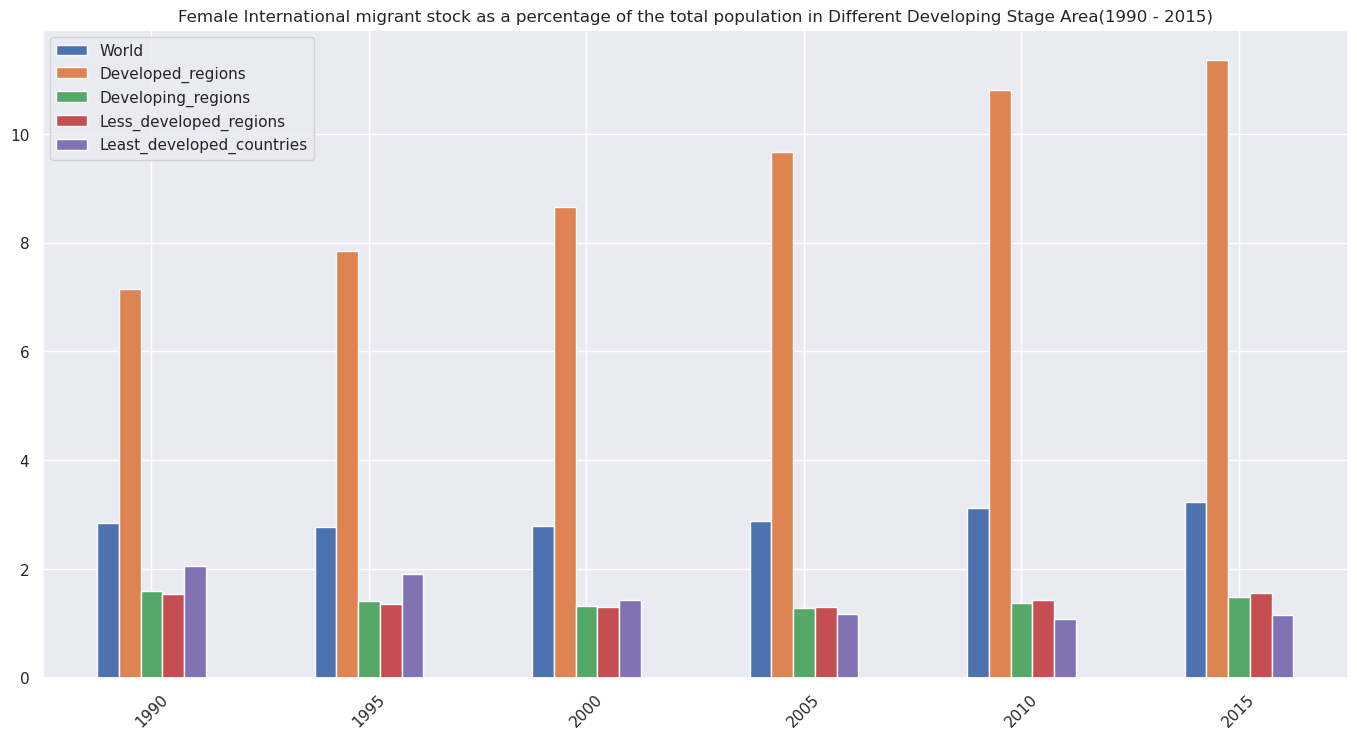

In [239]:
# Create the barplot.
# input data
World = [2.834740, 2.775658, 2.788169, 2.887645, 3.117222, 3.228342]  
Developed_regions = [7.147777, 7.849480, 8.650694, 9.656595, 10.811029, 11.348476]
Developing_regions = [1.595116, 1.417459, 1.315351, 1.279428, 1.378176, 1.490610]
Less_developed_regions = [1.530877, 1.344872, 1.299002, 1.296941, 1.432634, 1.555397]
Least_developed_countries = [2.045276, 1.901226, 1.418405, 1.175548, 1.073428, 1.148865]
# Set index
index = ['1990', '1995', '2000',
         '2005', '2010', '2015']
dev3_bar = pd.DataFrame({'World': World,
            'Developed_regions': Developed_regions,
            'Developing_regions': Developing_regions,
            'Less_developed_regions': Less_developed_regions,
            'Least_developed_countries': Least_developed_countries}, index=index)
dev3_bar.plot.bar(figsize=(15,8),rot=45, title='Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)')

<AxesSubplot:title={'center':'Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)'}>

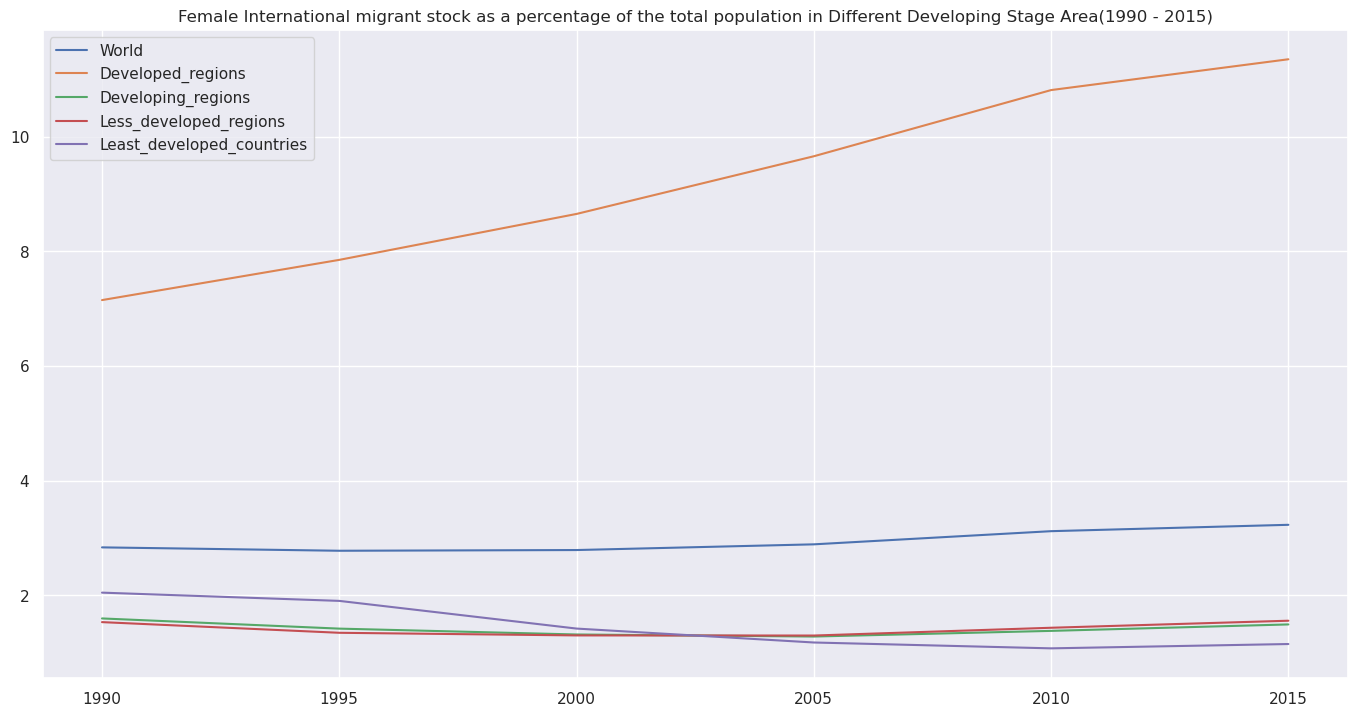

In [240]:
# Create line chart
dev3_bar.plot(figsize=(15,8),title='Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)')

In [171]:
import seaborn as sns

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WORLD'),
  Text(1, 0, 'Less developed regions excluding least developed countries'),
  Text(2, 0, 'Least developed countries'),
  Text(3, 0, 'Developing regions'),
  Text(4, 0, 'Developed regions')])

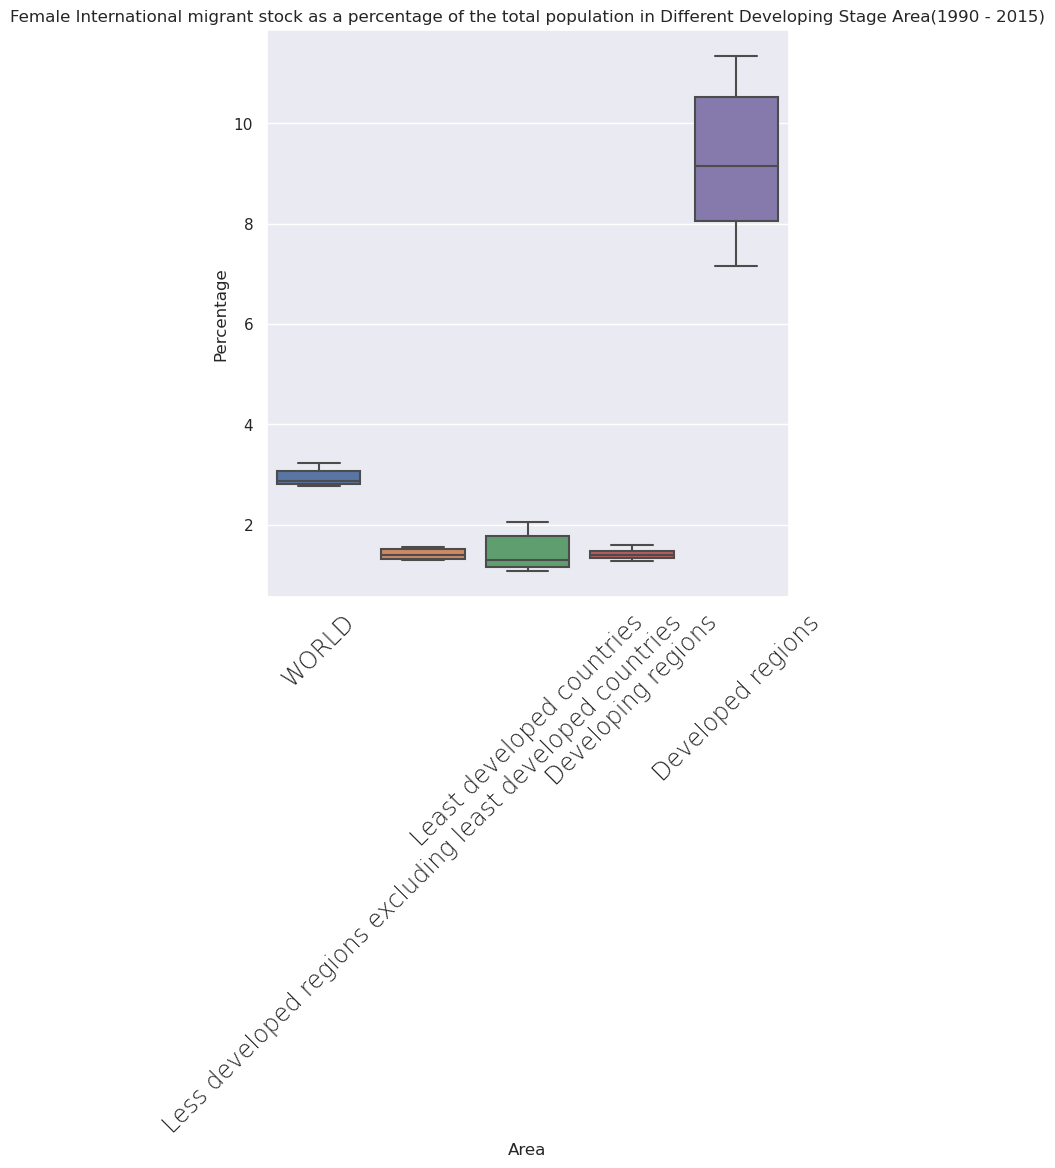

In [270]:
dev3_box = sns.boxplot(data = dev_sorted3, x="Area", y="Percentage").set(title = 'Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)')
sns.set(rc={'figure.figsize':(6,7)})
plt.xticks(rotation=45,    
           fontweight='light',
           fontsize='x-large' )

# Table 4 EDA

In [201]:
# read original xlsx
df_UN_T4 = pd.read_excel("data/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 4")
df_UN_T4.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# remove the introduction text
df_UN_T4.drop(df_UN_T4.index[0:15], axis=0, inplace=True)
df_UN_T4.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
15,1,WORLD,NaN,900,NaN,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,(b),901,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,(c),902,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,(d),941,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [203]:
# check headers
df_UN_T4.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [204]:
# remove unnecessary columns 
df_UN_T4.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df_UN_T4

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
15,1,WORLD,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398
...,...,...,...,...,...,...,...,...
275,261,Samoa,47.244564,47.784406,48.299433,48.833971,49.355720,49.908704
276,262,Tokelau,44.444444,44.736842,45.038168,48.449612,51.981352,52.156057
277,263,Tonga,48.883545,47.525962,46.226927,45.873053,45.698925,45.437096
278,264,Tuvalu,43.396226,43.726236,44.239631,44.808743,44.805195,44.680851


In [205]:
# split 1st sub-dataset sorted by developing status
df_dev4 = df_UN_T4.iloc[0:5]
df_dev4

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
15,1,WORLD,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [206]:
# rename headers
df_dev4 = df_dev4.rename(columns={'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Area','Unnamed: 5': '1990','Unnamed: 6': '1995',
                                'Unnamed: 7': '2000','Unnamed: 8': '2005','Unnamed: 9': '2010','Unnamed: 10': '2015'})                     
df_dev4

,Sort Order,Area,1990,1995,2000,2005,2010,2015
15,1,WORLD,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
16,2,Developed regions,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
17,3,Developing regions,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
18,4,Least developed countries,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
19,5,Less developed regions excluding least develop...,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [207]:
# re-organize the df_dev4
df_dev4 = df_dev4.melt(id_vars=["Sort Order","Area"], var_name=["Year"],value_name="Female migrants as a percentage of the international migrant stock")
df_dev4.head()

,Sort Order,Area,Year,Female migrants as a percentage of the international migrant stock
0,1,WORLD,1990,49.03915
1,2,Developed regions,1990,51.123977
2,3,Developing regions,1990,46.592099
3,4,Least developed countries,1990,47.261155
4,5,Less developed regions excluding least develop...,1990,46.466684


In [210]:
#sorting rows and columns
dev_sorted4 = df_dev4.sort_values('Area', ascending=False)
dev_sorted4

,Sort Order,Area,Year,Female migrants as a percentage of the international migrant stock
0,1,WORLD,1990,49.03915
5,1,WORLD,1995,49.16879
25,1,WORLD,2015,48.249769
20,1,WORLD,2010,48.30566
10,1,WORLD,2000,49.112244
15,1,WORLD,2005,48.832993
29,5,Less developed regions excluding least develop...,2015,42.984398
19,5,Less developed regions excluding least develop...,2005,45.130768
9,5,Less developed regions excluding least develop...,1995,46.279022
4,5,Less developed regions excluding least develop...,1990,46.466684


<AxesSubplot:title={'center':'Female migrants as a percentage of the international migrant stock)'}>

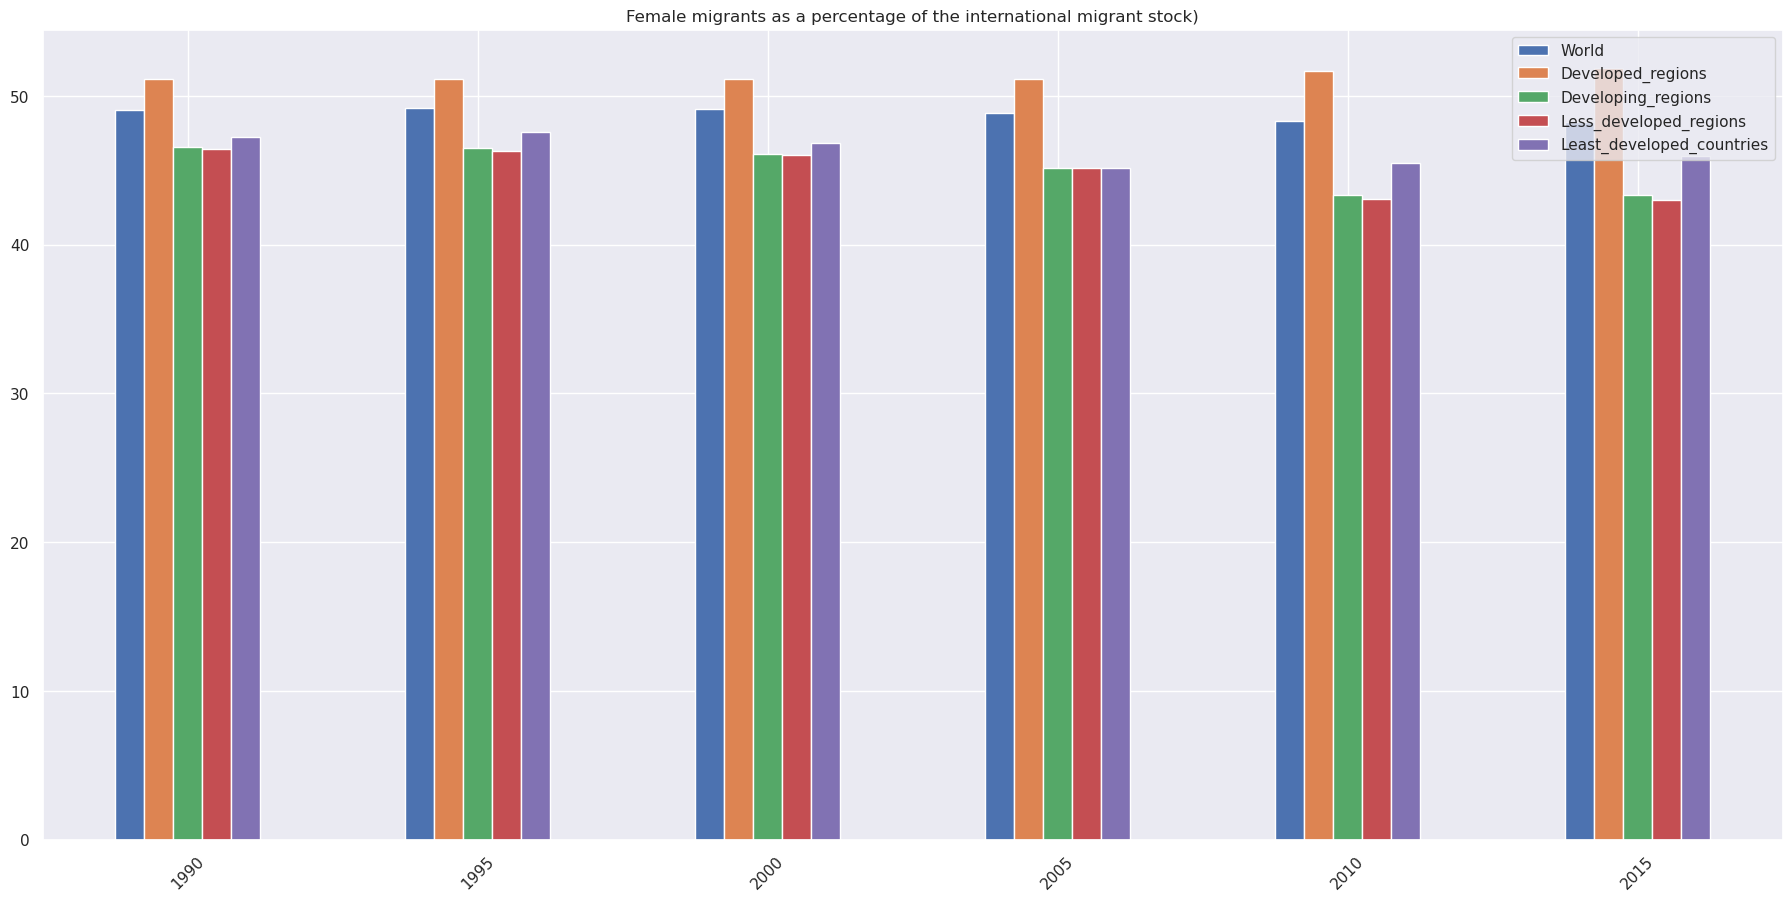

In [220]:
# Create the barplot.
# input data
World = [49.03915, 49.16879, 49.112244, 48.832993, 48.30566, 48.249769]  
Developed_regions = [51.123977, 51.149024, 51.113307, 51.171501, 51.658932, 51.866687]
Developing_regions = [46.592099, 46.500135, 46.128444, 45.134297, 43.31978, 43.327078]
Less_developed_regions = [46.466684, 46.279022, 46.009598, 45.130768, 43.043672, 42.984398]
Least_developed_countries = [47.261155, 47.571664, 46.826689, 45.157406, 45.499573, 45.942752]
# Set index
index = ['1990', '1995', '2000',
         '2005', '2010', '2015']
dev3_bar = pd.DataFrame({'World': World,
            'Developed_regions': Developed_regions,
            'Developing_regions': Developing_regions,
            'Less_developed_regions': Less_developed_regions,
            'Least_developed_countries': Least_developed_countries}, index=index)
dev3_bar.plot.bar(figsize=(20,10),rot=45, title='Female migrants as a percentage of the international migrant stock)')

<AxesSubplot:title={'center':'Female migrants as a percentage of the international migrant stock)'}>

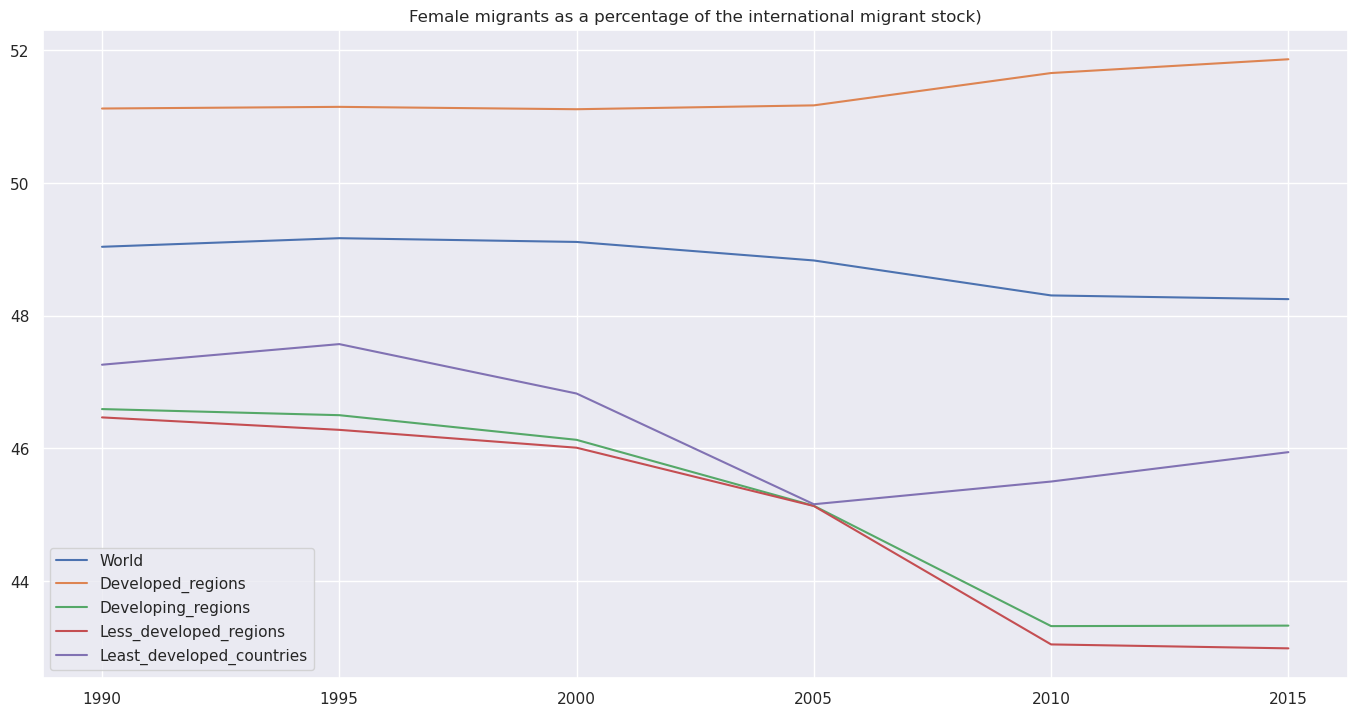

In [221]:
# Create line chart
dev3_bar.plot(figsize=(15,8),title='Female migrants as a percentage of the international migrant stock)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WORLD'),
  Text(1, 0, 'Less developed regions excluding least developed countries'),
  Text(2, 0, 'Least developed countries'),
  Text(3, 0, 'Developing regions'),
  Text(4, 0, 'Developed regions')])

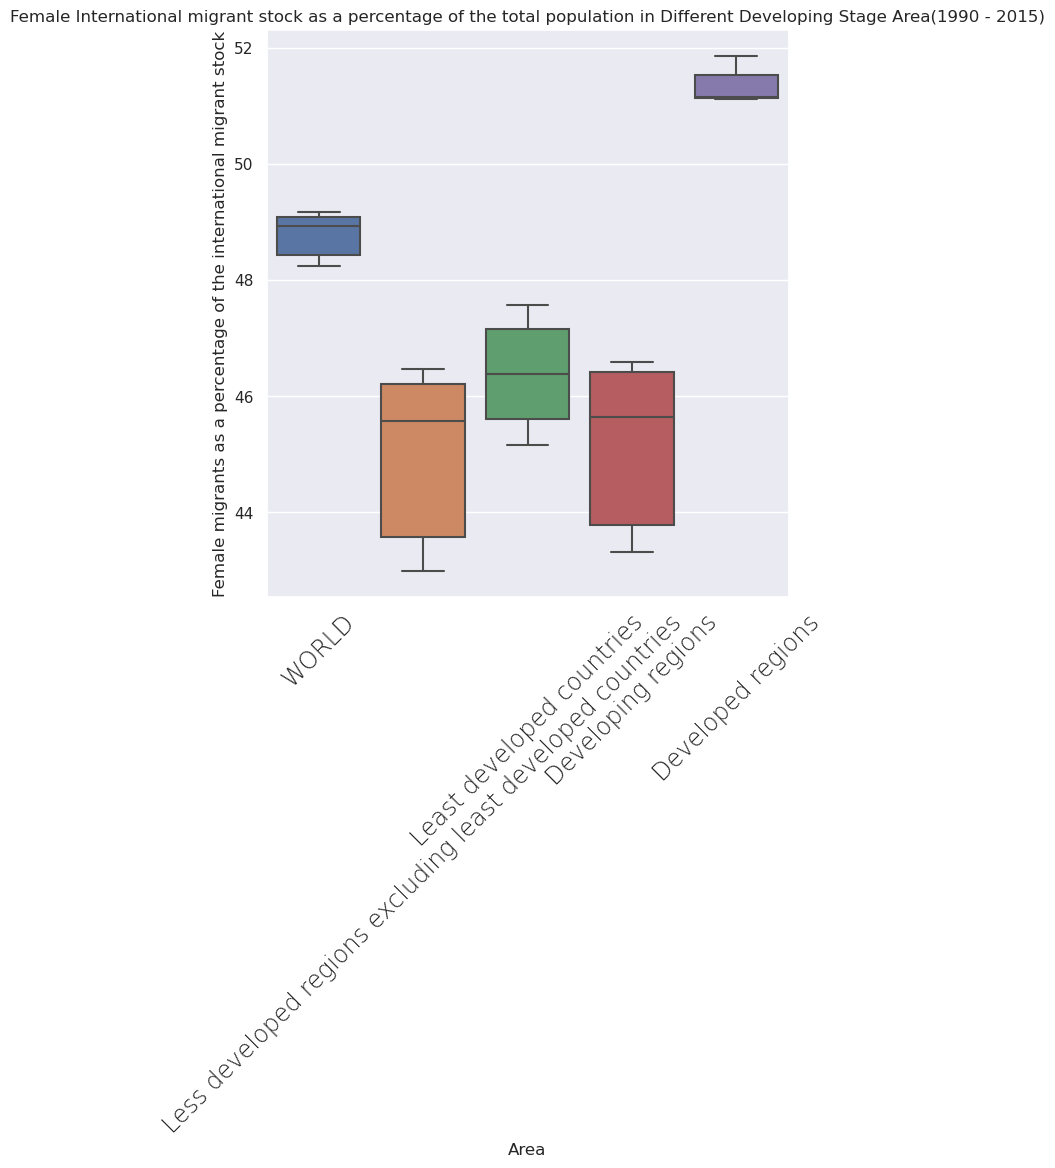

In [214]:
dev4_box = sns.boxplot(data = dev_sorted4, x="Area", y="Female migrants as a percentage of the international migrant stock").set(title = 'Female International migrant stock as a percentage of the total population in Different Developing Stage Area(1990 - 2015)')
sns.set(rc={'figure.figsize':(6,7)})
plt.xticks(rotation=45,    
           fontweight='light',
           fontsize='x-large' )

# Table 5 EDA

In [223]:
# read original xlsx
df_UN_T5 = pd.read_excel("data/UN_MigrantStockTotal_2015.xlsx", sheet_name = "Table 5")
df_UN_T5.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
# remove the introduction text
df_UN_T5.drop(df_UN_T5.index[0:15], axis=0, inplace=True)
df_UN_T5.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
15,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


In [225]:
# check headers
df_UN_T5.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [226]:
# remove unnecessary columns 
df_UN_T5.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df_UN_T5

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
15,1,WORLD,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,261,Samoa,6.704748,4.90282,-0.858442,-2.299179,-0.768177,6.499035,4.704571,-1.066301,-2.50417,-0.987758,6.931983,5.117229,-0.638315,-2.08663,-0.545343
276,262,Tokelau,-0.298513,-0.303036,-0.307698,10.169947,2.536144,-0.404054,-0.412386,-1.589283,8.750541,2.463246,-0.167365,-0.168777,1.152582,11.577161,2.60325
277,263,Tonga,2.350316,2.359733,3.096969,3.099614,2.641235,2.874558,2.848819,3.228155,3.163851,2.737439,1.787022,1.80546,2.943277,3.023552,2.526318
278,264,Tuvalu,-3.797947,-3.845134,-3.408224,-3.450671,-1.763854,-3.914892,-4.028435,-3.613401,-3.449385,-1.718849,-3.646431,-3.611679,-3.152579,-3.452255,-1.819436


In [227]:
# split 1st sub-dataset sorted by developing status
df_dev5 = df_UN_T5.iloc[0:5]
df_dev5

,Unnamed: 0,Unnamed: 1,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
15,1,WORLD,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


In [228]:
# rename headers
df_dev5 = df_dev5.rename(columns={'Unnamed: 0': 'Sort Order', 'Unnamed: 1': 'Area','Unnamed: 5': 'b1990-1995','Unnamed: 6': 'b1995-2000',
                                'Unnamed: 7': 'b2000-2005','Unnamed: 8': 'b2005-2010','Unnamed: 9': 'b2010-2015','Unnamed: 10': 'm1990-1995',
                               'Unnamed: 11': 'm1995-2000','Unnamed: 12': 'm2000-2005','Unnamed: 13': 'm2005-2010','Unnamed: 14': 'm2010-2015',
                               'Unnamed: 15': 'f1990-1995','Unnamed: 16': 'f1995-2000','Unnamed: 17': 'f2000-2005','Unnamed: 18': 'f2005-2010',
                               'Unnamed: 19': 'f2010-2015'})                     
df_dev5

,Sort Order,Area,b1990-1995,b1995-2000,b2000-2005,b2005-2010,b2010-2015,m1990-1995,m1995-2000,m2000-2005,m2005-2010,m2010-2015,f1990-1995,f1995-2000,f2000-2005,f2005-2010,f2010-2015
15,1,WORLD,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
16,2,Developed regions,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
17,3,Developing regions,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
18,4,Least developed countries,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
19,5,Less developed regions excluding least develop...,-0.803244,0.850177,1.62934,4.159339,2.852687,-0.733256,0.950231,1.952269,4.90598,2.87349,-0.88418,0.733402,1.243624,3.212358,2.825127


In [229]:
# re-organize the df_dev5
df_dev5 = df_dev5.melt(id_vars=["Sort Order","Area"], var_name=["Sexyear"],value_name="Annual rate of change of the migrant stock")
df_dev5

,Sort Order,Area,Sexyear,Annual rate of change of the migrant stock
0,1,WORLD,b1990-1995,1.051865
1,2,Developed regions,b1990-1995,2.275847
2,3,Developing regions,b1990-1995,-0.487389
3,4,Least developed countries,b1990-1995,1.118175
4,5,Less developed regions excluding least develop...,b1990-1995,-0.803244
...,...,...,...,...
70,1,WORLD,f2010-2015,1.867837
71,2,Developed regions,f2010-2015,1.241097
72,3,Developing regions,f2010-2015,2.933003
73,4,Least developed countries,f2010-2015,3.72079


In [230]:
# split column "Sexyear"
df_dev5=(df_dev5.assign(gender = lambda x: x.Sexyear.str[0].astype(str), year = lambda x: x.Sexyear.str[1:].astype(str)).drop("Sexyear",axis=1))
df_dev5

,Sort Order,Area,Annual rate of change of the migrant stock,gender,year
0,1,WORLD,1.051865,b,1990-1995
1,2,Developed regions,2.275847,b,1990-1995
2,3,Developing regions,-0.487389,b,1990-1995
3,4,Least developed countries,1.118175,b,1990-1995
4,5,Less developed regions excluding least develop...,-0.803244,b,1990-1995
...,...,...,...,...,...
70,1,WORLD,1.867837,f,2010-2015
71,2,Developed regions,1.241097,f,2010-2015
72,3,Developing regions,2.933003,f,2010-2015
73,4,Least developed countries,3.72079,f,2010-2015


In [231]:
# Styling the dataset
df_dev5=(df_dev5.replace(to_replace =["b","m","f"],value =["Both sex","Male","Female"])
            .dropna())
df_dev5

,Sort Order,Area,Annual rate of change of the migrant stock,gender,year
0,1,WORLD,1.051865,Both sex,1990-1995
1,2,Developed regions,2.275847,Both sex,1990-1995
2,3,Developing regions,-0.487389,Both sex,1990-1995
3,4,Least developed countries,1.118175,Both sex,1990-1995
4,5,Less developed regions excluding least develop...,-0.803244,Both sex,1990-1995
...,...,...,...,...,...
70,1,WORLD,1.867837,Female,2010-2015
71,2,Developed regions,1.241097,Female,2010-2015
72,3,Developing regions,2.933003,Female,2010-2015
73,4,Least developed countries,3.720790,Female,2010-2015


In [233]:
#remove the "male" and "both sex" rows since we only study on female data
df_dev5 = df_dev5[df_dev5["gender"] == "Female"]
df_dev5

,Sort Order,Area,Annual rate of change of the migrant stock,gender,year
50,1,WORLD,1.104667,Female,1990-1995
51,2,Developed regions,2.285643,Female,1990-1995
52,3,Developing regions,-0.526904,Female,1990-1995
53,4,Least developed countries,1.249146,Female,1990-1995
54,5,Less developed regions excluding least develop...,-0.884180,Female,1990-1995
55,1,WORLD,1.405044,Female,1995-2000
56,2,Developed regions,2.250995,Female,1995-2000
57,3,Developing regions,0.081268,Female,1995-2000
58,4,Least developed countries,-3.316818,Female,1995-2000
59,5,Less developed regions excluding least develop...,0.733402,Female,1995-2000


In [234]:
#sorting rows and columns
dev_sorted5 = df_dev5.sort_values('Area', ascending=False)
dev_sorted5

,Sort Order,Area,Annual rate of change of the migrant stock,gender,year
50,1,WORLD,1.104667,Female,1990-1995
70,1,WORLD,1.867837,Female,2010-2015
65,1,WORLD,2.737012,Female,2005-2010
55,1,WORLD,1.405044,Female,1995-2000
60,1,WORLD,1.928080,Female,2000-2005
59,5,Less developed regions excluding least develop...,0.733402,Female,1995-2000
69,5,Less developed regions excluding least develop...,3.212358,Female,2005-2010
64,5,Less developed regions excluding least develop...,1.243624,Female,2000-2005
74,5,Less developed regions excluding least develop...,2.825127,Female,2010-2015
54,5,Less developed regions excluding least develop...,-0.884180,Female,1990-1995


<AxesSubplot:title={'center':'Annual rate of change of the migrant stock (1990-2015)'}>

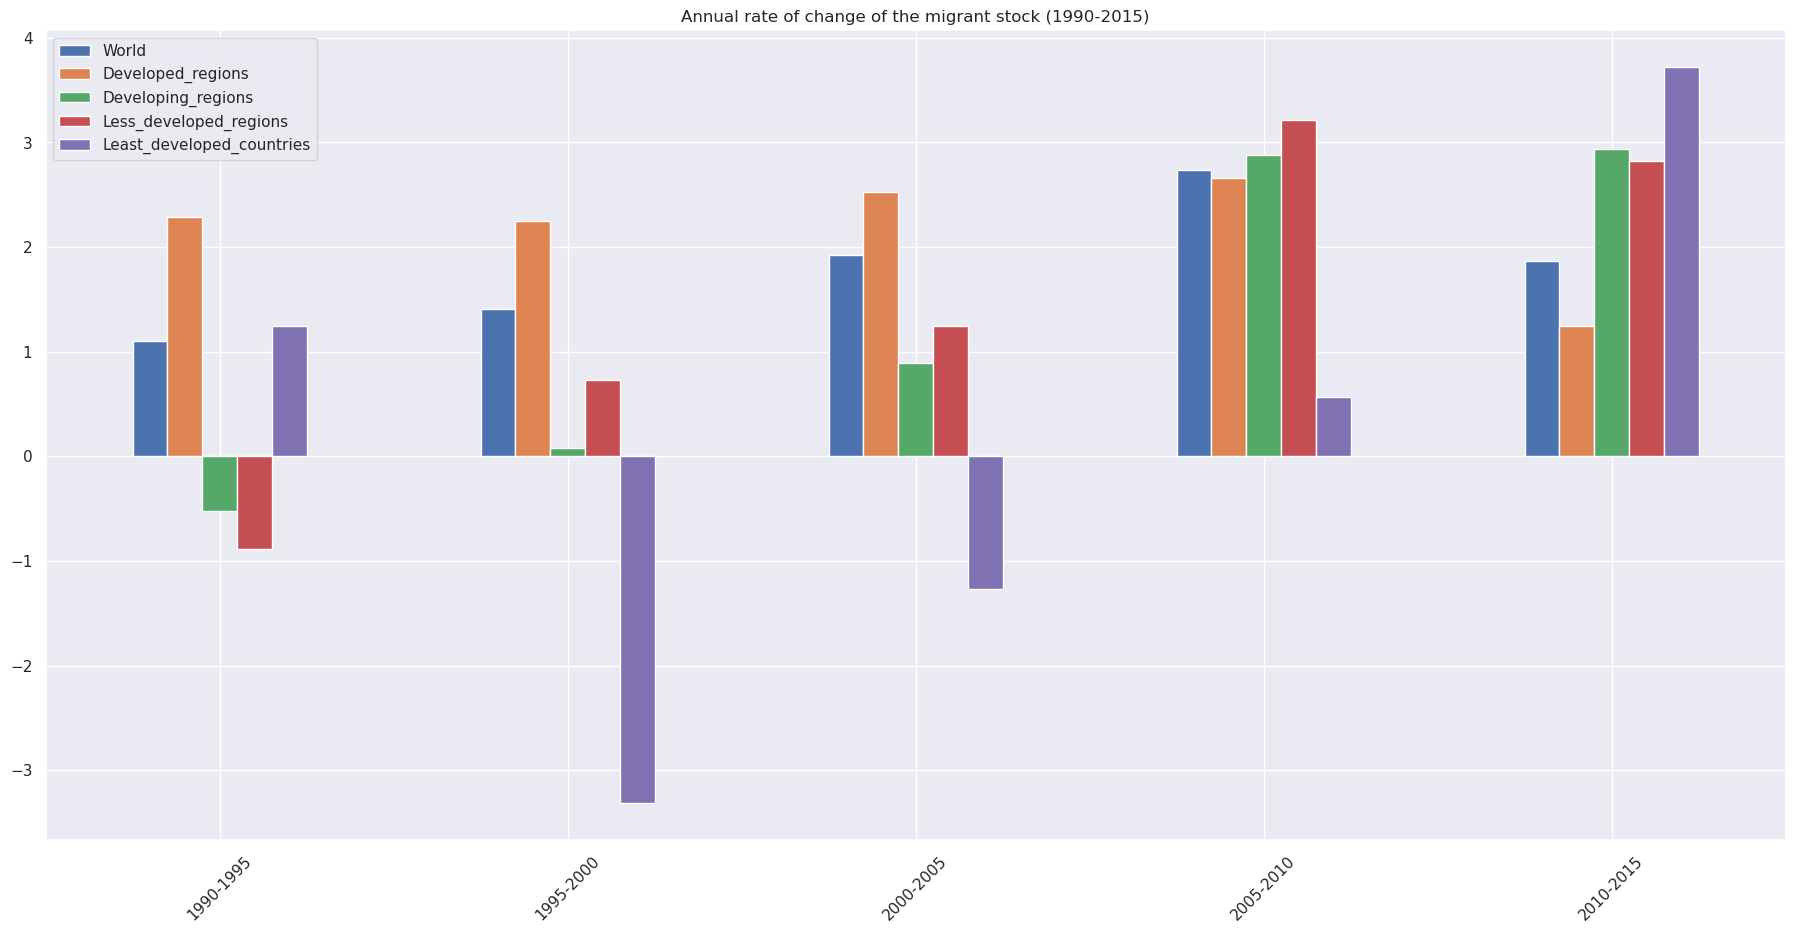

In [237]:
# Create the barplot.
# input data
World = [1.104667, 1.405044, 1.928080, 2.737012, 1.867837]  
Developed_regions = [2.285643, 2.250995, 2.529838, 2.655950, 1.241097]
Developing_regions = [-0.526904, 0.081268, 0.892360, 2.881555, 2.933003]
Less_developed_regions = [-0.884180, 0.733402, 1.243624, 3.212358, 2.825127]
Least_developed_countries = [1.249146, -3.316818, -1.265617, 0.570110, 3.720790]
# Set index
index = ['1990-1995', '1995-2000', '2000-2005',
         '2005-2010', '2010-2015']
dev5_bar = pd.DataFrame({'World': World,
            'Developed_regions': Developed_regions,
            'Developing_regions': Developing_regions,
            'Less_developed_regions': Less_developed_regions,
            'Least_developed_countries': Least_developed_countries}, index=index)
dev5_bar.plot.bar(figsize=(20,10),rot=45, title='Annual rate of change of the migrant stock (1990-2015)')

<AxesSubplot:title={'center':'Annual rate of change of the migrant stock (1990-2015)'}>

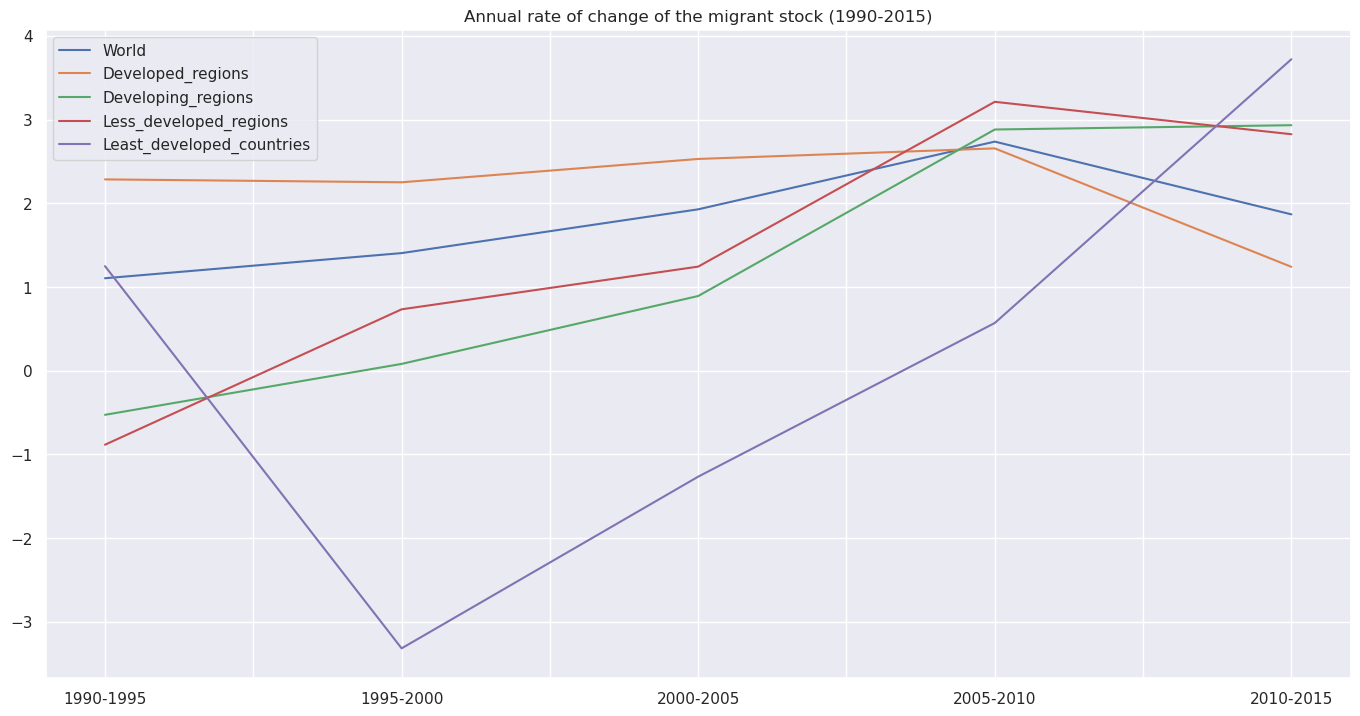

In [238]:
# Create line chart
dev5_bar.plot(figsize=(15,8),title='Annual rate of change of the migrant stock (1990-2015)')

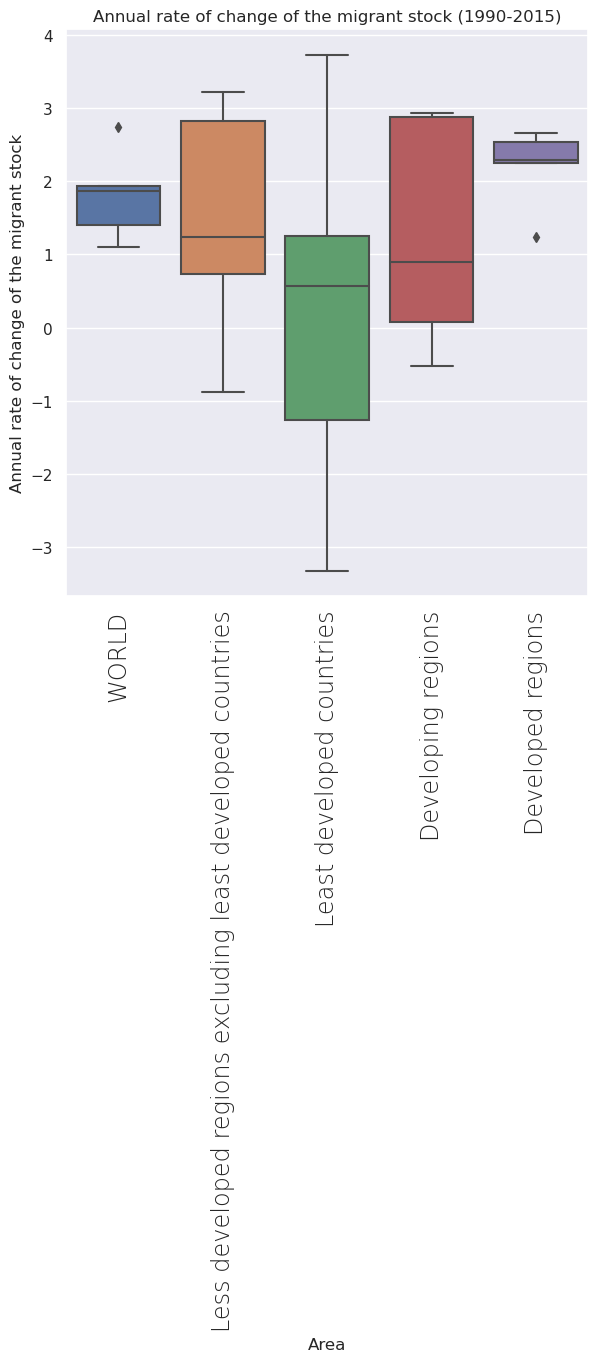

In [269]:
dev5_box = sns.boxplot(data = dev_sorted5, x="Area", y="Annual rate of change of the migrant stock").set(title = 'Annual rate of change of the migrant stock (1990-2015)')
sns.set(rc={'figure.figsize':(6,7)})
plt.xticks(rotation=90,    
           fontweight='light',
           fontsize='x-large' )

# Table 6 EDA

Since Table 6 only contains both-sex migrants’ data, thus, we remove this sub-dataset as it will not influent our study.

In [266]:
import PIL
from PIL import Image